In [1]:
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
from   sklearn.cluster   import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Il n'y a pas de valeurs manquantes

In [3]:
spending_by_gender = df.groupby('Gender')['Spending Score (1-100)'].mean()
spending_by_gender

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

<BarContainer object of 2 artists>

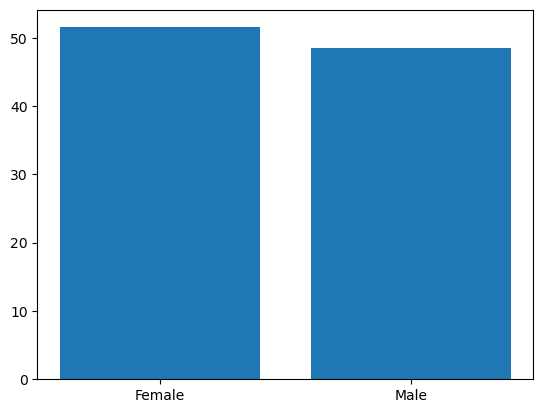

In [4]:
plt.bar(spending_by_gender.index, spending_by_gender.values)

Je vois peu de différence. Que révèle un diagramme de dispersion.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

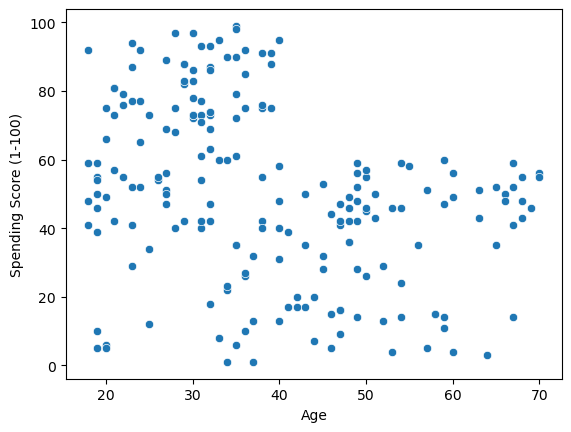

In [5]:
sns.scatterplot(df, x='Age', y='Spending Score (1-100)')

Il est évident que les personnes de 20 à 40 ans ont des scores de dépenses plus élevés que celles de 50 à 70 ans.

Que montre le diagramme si les revenus annuels sont en abcisses et les dépenses en ordonnées ?

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

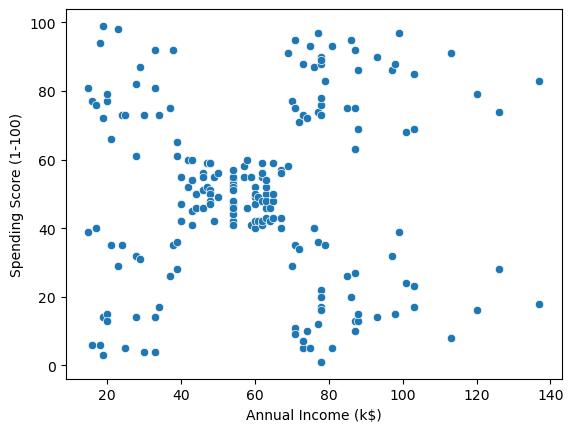

In [6]:
sns.scatterplot(df, x='Annual Income (k$)', y='Spending Score (1-100)')

Il y a plusieurs groupes.
Combien ?

Stocker les features (dépenses et revenus) dans x et y.

In [7]:
X = df.drop(columns=['CustomerID', 'Gender', 'Age']).values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

L'inertie est la distance entre les points et le centroïde.
Elle permet l'évaluation du modèle KMeans.
Si elle est faible, c'est bien.

Si on veut trois groupes, KMeans cherchera trois centroïdes.

En créant le modèle KMeans et appliquant la méthode du code "elbow method", pour connaître le meilleur nombre de clutsters (groupes).

In [8]:
inertia = []

for i in range(2, 11):
    model = KMeans(n_clusters=i, random_state=7)
    model.fit(X)
    inertia.append(model.inertia_)

inertia

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

[184131.88502788503,
 154609.87034894928,
 73880.64496247197,
 44448.45544793371,
 38858.9599751439,
 31969.426550235476,
 29829.73963965765,
 28268.81430258338,
 21681.522257128836]

Plus il y a de cluster, plus l'intertie dimminue.

Text(0, 0.5, 'Inertie')

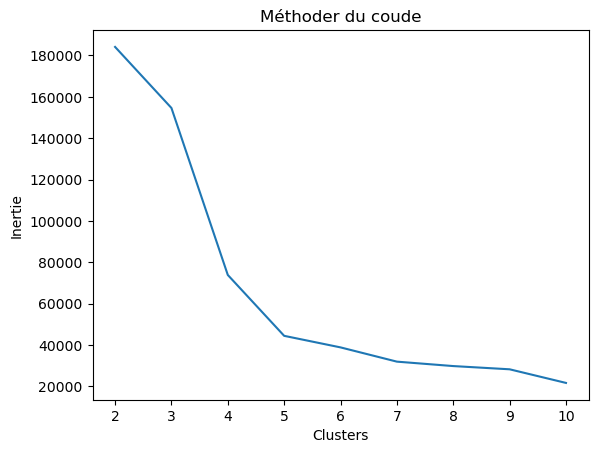

In [9]:
plt.plot(range(2, 11), inertia)
plt.title('Méthoder du coude')
plt.xlabel('Clusters')
plt.ylabel('Inertie')

Le coude est le 5. Là où l'inertie descend.

In [10]:
KMeansModel = KMeans(n_clusters=5, random_state=786)
KMeansModel.fit(X)
centers = KMeansModel.cluster_centers_
centers

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

Il faut créer le modèle avec cinq clusters.

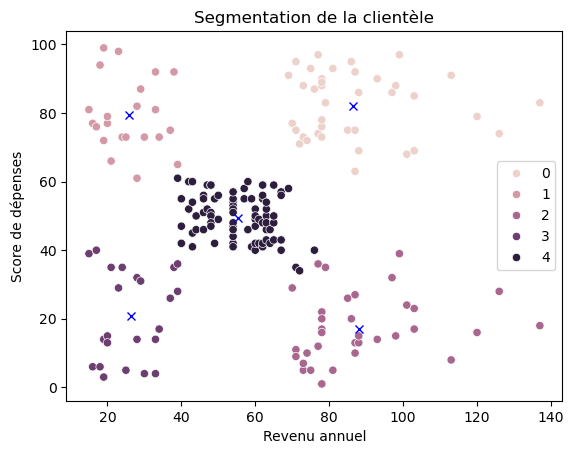

In [11]:
center_x = centers[:, 0]
center_y = centers[:, 1]
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=KMeansModel.predict(X))
plt.plot(center_x, center_y, 'xb')
plt.title('Segmentation de la clientèle')
plt.xlabel('Revenu annuel')
plt.ylabel('Score de dépenses')
plt.show()

Il y a cinq clusters selon les revenus annuels et dépenses.

In [12]:
KMeansModel.predict(X)

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)